## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Percentage of non-fraudulent data: ",normal_share)
print("Percentage of fraudulent data: ",fraud_share)

Percentage of non-fraudulent data:  99.82725143693798
Percentage of fraudulent data:  0.1727485630620034


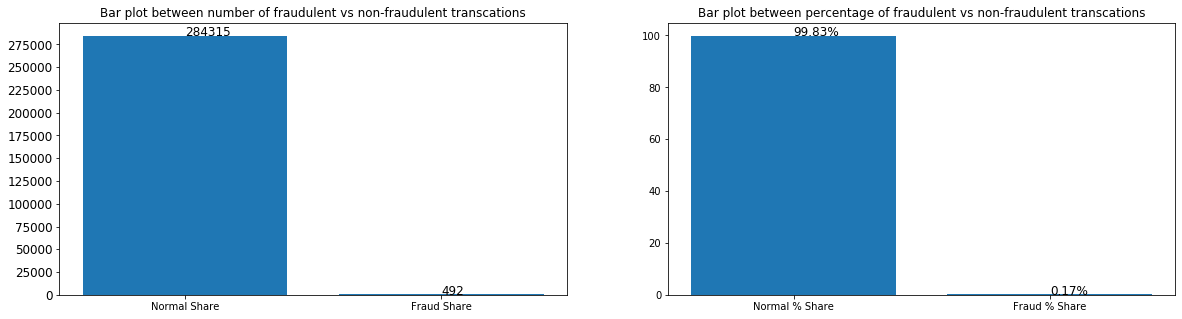

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Bar plot between number of fraudulent vs non-fraudulent transcations")
plt.yticks(np.arange(0,classes[0], step=25000),fontsize=12)
plt.bar(['Normal Share','Fraud Share'],classes)
for i, v in enumerate(classes):
    v=round(v,2)
    plt.text(i, v, str(v), color='black',fontsize=12)
plt.subplot(1,2,2)
plt.title("Bar plot between percentage of fraudulent vs non-fraudulent transcations")
plt.bar(['Normal % Share','Fraud % Share'],[normal_share,fraud_share])
for i, v in enumerate([normal_share,fraud_share]):
    v=round(v,2)
    plt.text(i, v, str(v)+"%", color='black',fontsize=12)
plt.show()

KeyError: 'Time'

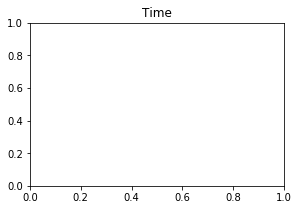

In [294]:
# Creating a distribution plot and scatter plot to observe the distribution of classes with time
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title("Time")
sns.scatterplot(x=df['Time'],y=df['Class'])
plt.subplot(1,2,2)
plt.title("Time")
sns.distplot(df['Time'].values)

KeyError: 'Class'

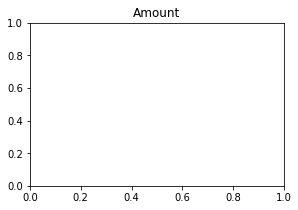

In [295]:
# Create a distribution plot and scatter plot to observe the distribution of classes with Amount
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title("Amount")
sns.scatterplot(x=df['Amount'],y=df['Class'])
plt.subplot(1,2,2)
plt.title("Amount")
sns.distplot(df['Amount'].values)

In [9]:
# Drop unnecessary columns
df=df.drop('Time',axis=1)

### Splitting the data into train & test data

In [10]:
y = df.pop('Class')
X = df

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [12]:
print("Total fraud data in whole dataset: ",np.sum(y))
print("Fraud data in train dataset: ",np.sum(y_train))
print("Fraud data in test dataset: ",np.sum(y_test))

Total fraud data in whole dataset:  492
Fraud data in train dataset:  356
Fraud data in test dataset:  136


### Plotting the distribution of each variable in train dataset

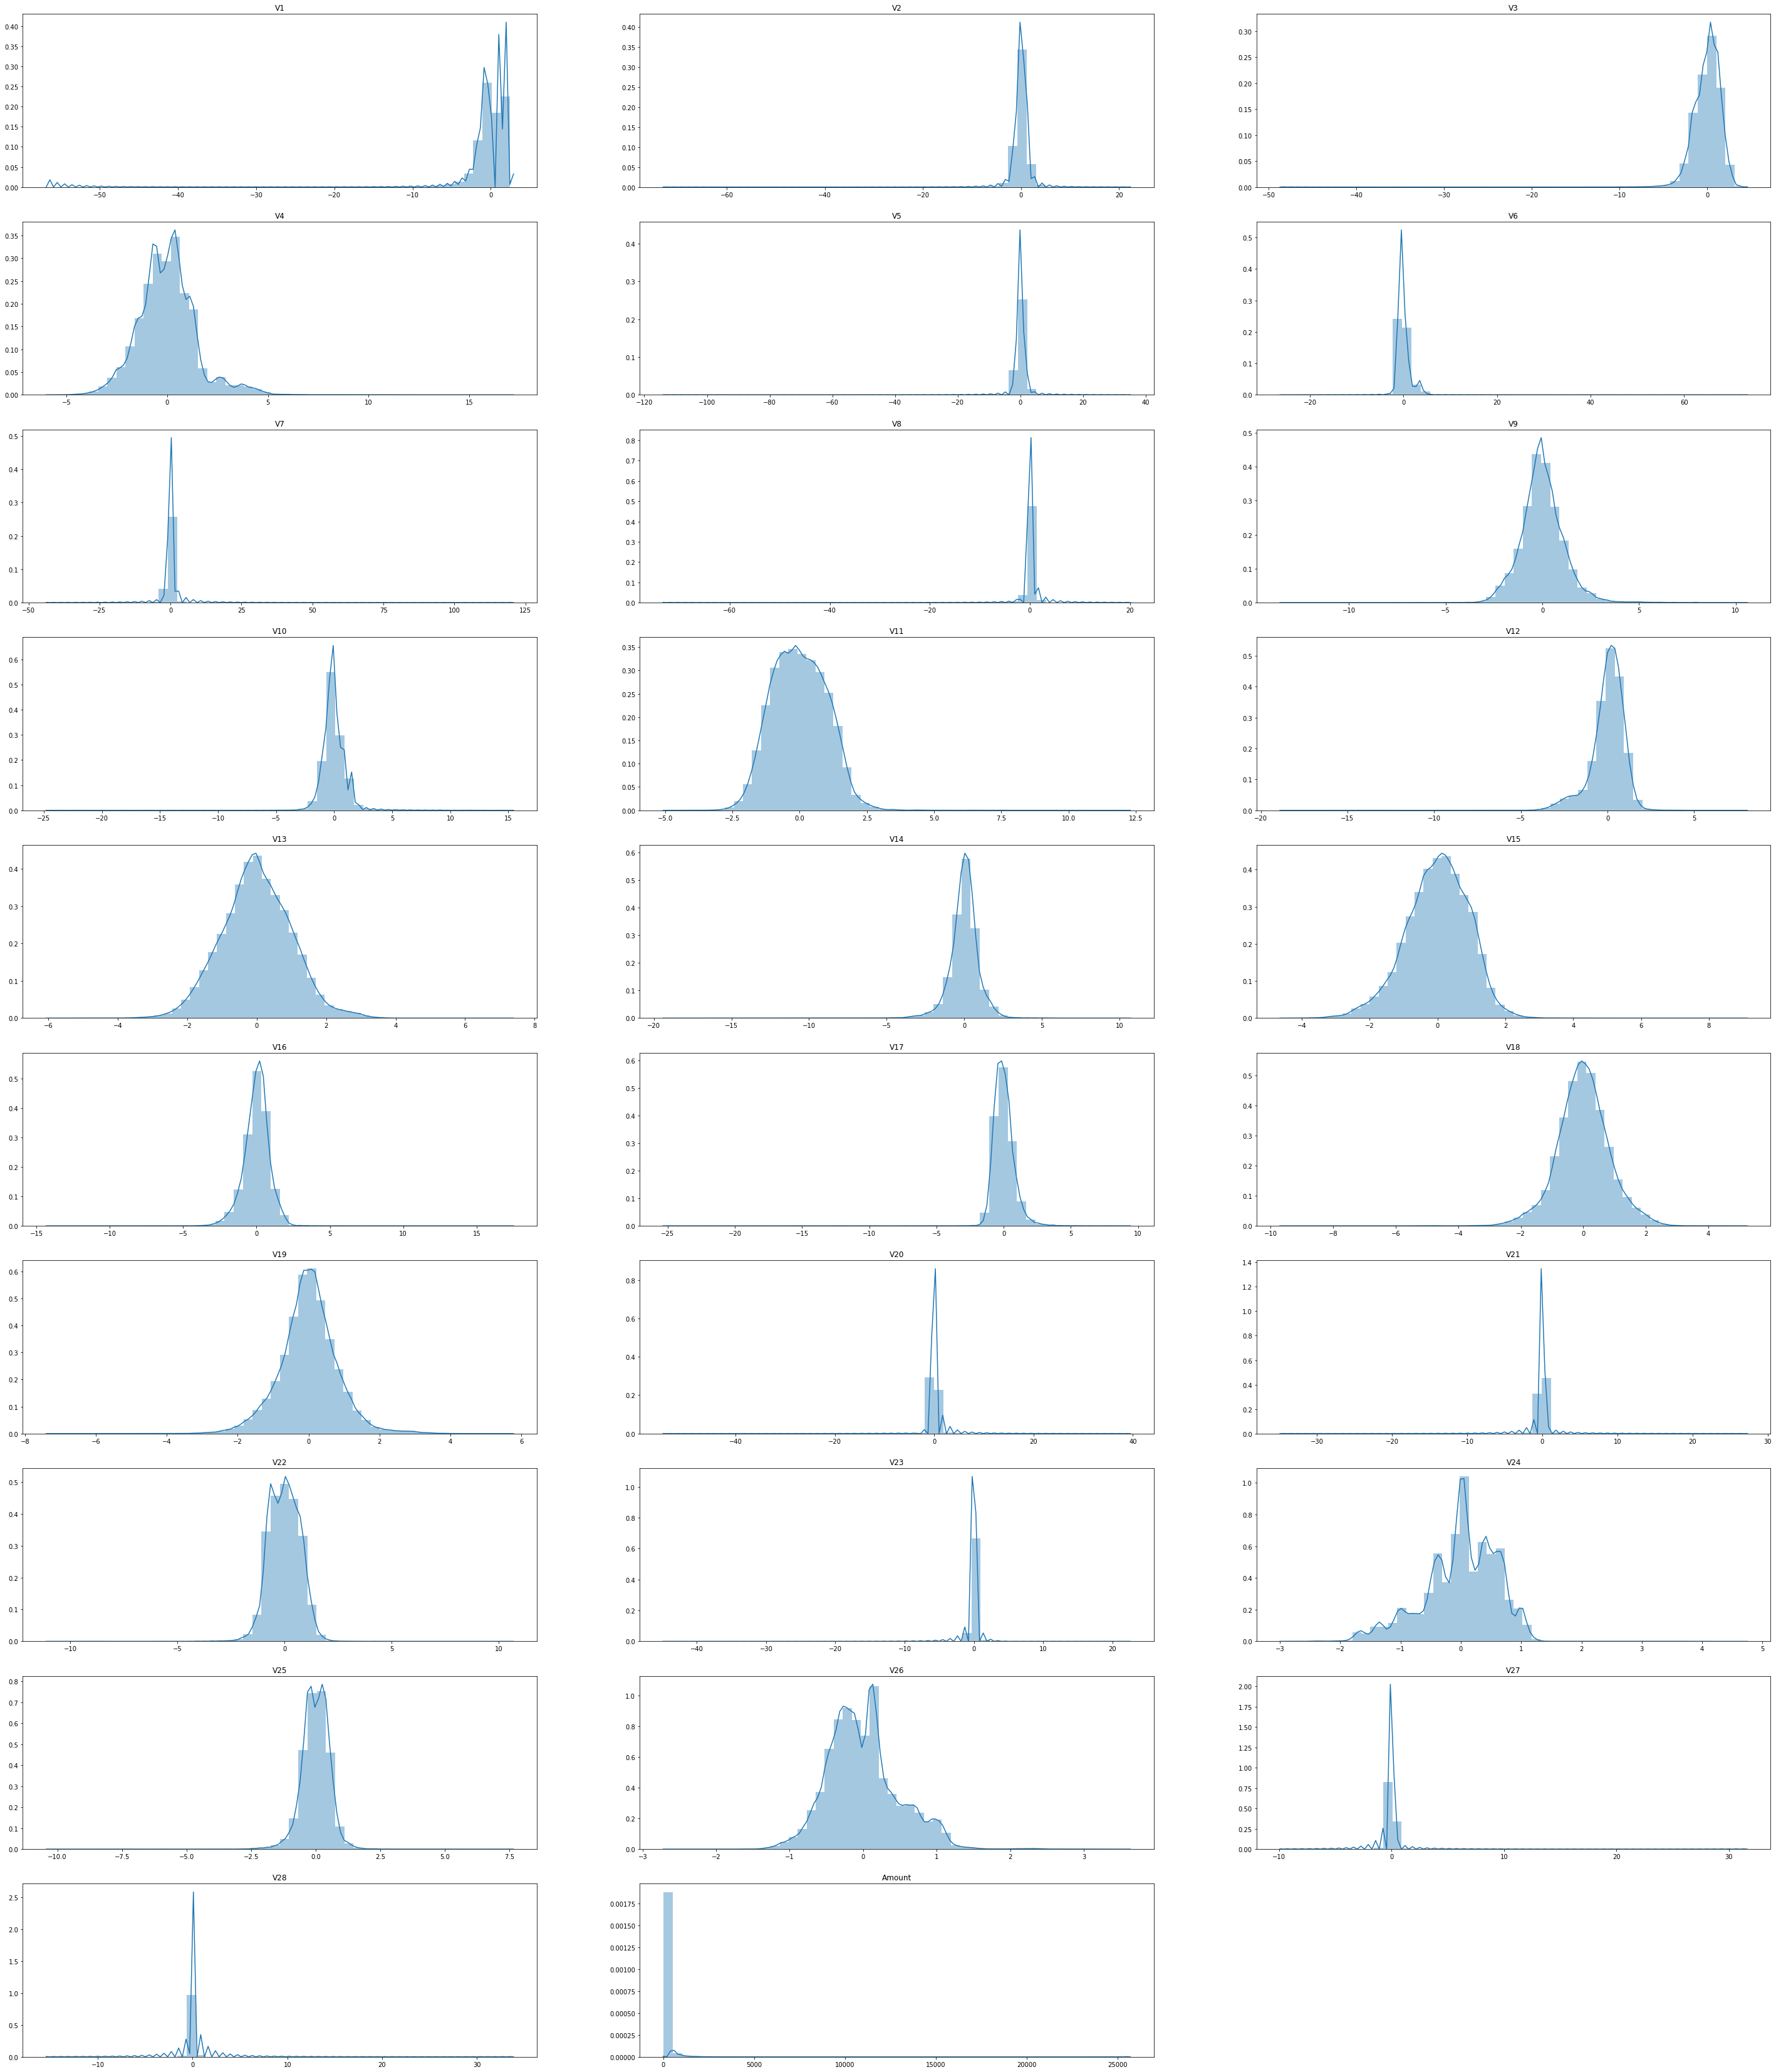

In [13]:
#Univariate Analysis
plt.figure(figsize = (50,60))
for i,j in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    plt.title(j)
    sns.distplot(X_train[j].values)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [14]:
#Applying preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pw_trns = PowerTransformer()

In [15]:
#Since Amount and V8 column is heavily skewed, thus doing power transform on these columns in train and test dataset
X_train['Amount']=pw_trns.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['V8']=pw_trns.fit_transform(X_train['V8'].values.reshape(-1,1))

In [16]:
X_test['Amount']=pw_trns.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['V8']=pw_trns.fit_transform(X_test['V8'].values.reshape(-1,1))

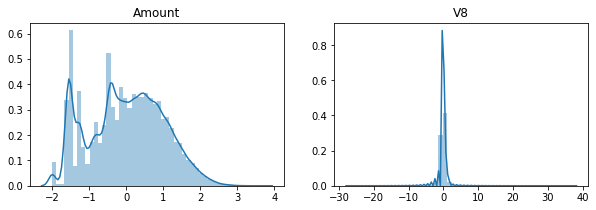

In [17]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title("Amount")
sns.distplot(X_train['Amount'].values)
plt.subplot(1,2,2)
plt.title("V8")
sns.distplot(X_train['V8'].values)

## Model Building
- Build different models on the imbalanced dataset and see the result

### 1a. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [19]:
# Import RFE and select 14 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 14)             # running RFE with 14 variables as output
rfe = rfe.fit(X_train, y_train)

In [20]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('V1', False, 15),
 ('V2', False, 12),
 ('V3', False, 11),
 ('V4', True, 1),
 ('V5', False, 10),
 ('V6', False, 6),
 ('V7', False, 2),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', False, 9),
 ('V12', False, 13),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 8),
 ('V16', True, 1),
 ('V17', False, 16),
 ('V18', False, 14),
 ('V19', False, 4),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', True, 1),
 ('V24', True, 1),
 ('V25', False, 7),
 ('V26', False, 5),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', False, 3)]

In [21]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [22]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]

In [23]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199349
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -832.72
Date:                Mon, 06 Apr 2020   Deviance:                       1665.4
Time:                        16:28:51   Pearson chi2:                 5.30e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4707      0.147    -57.712      0.000      -8.758      -8.183
V4             0.6563      0.054     12.195      0.000       0.551       0.762
V8            -0.1559      0.031     -4.989      0.000      -0.217      -0.095
V9            -0.1444      0.091     -1.579      0.114      -0.324       0.035
V10           -0.5557      0.085     -6.529      0.000      -0.723      -0.389
V13           -0.2999      0.091     -3.296      0.001      -0.478      -0.122
V14           -0.6319      0.055    -11.472      0.000      -0.740      -0.524
V16           -0.2806      0.064     -4.394      0.000      -0.406      -0.155
V20           -0.1913      0.048     -3.997      0.000      -0.285      -0.098
V21            0.4169      0.073      5.740      0.000       0.275       0.559
V22            0.5609      0.141      3.977      0.000       0.284       0.837
V23           -0.1120      0.061     -1.835      0.067      -0.232       0.008
V24            0.1180      0.157      0.752      0.452      -0.190       0.426
V27           -0.6240      0.119     -5.245      0.000      -0.857      -0.391
V28           -0.3218      0.129     -2.492      0.013      -0.575      -0.069
==============================================================================
"""

In [24]:
#Dropping column V24 as it has p-value above 0.05
X_train_rfe.drop('V24', axis = 1, inplace = True)

In [25]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
fin=logm1.fit()
fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199350
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -833.00
Date:                Mon, 06 Apr 2020   Deviance:                       1666.0
Time:                        16:28:55   Pearson chi2:                 5.21e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4667      0.146    -57.817      0.000      -8.754      -8.180
V4             0.6588      0.054     12.237      0.000       0.553       0.764
V8            -0.1565      0.031     -4.999      0.000      -0.218      -0.095
V9            -0.1370      0.091     -1.507      0.132      -0.315       0.041
V10           -0.5564      0.085     -6.526      0.000      -0.724      -0.389
V13           -0.2939      0.090     -3.249      0.001      -0.471      -0.117
V14           -0.6234      0.054    -11.571      0.000      -0.729      -0.518
V16           -0.2899      0.063     -4.626      0.000      -0.413      -0.167
V20           -0.1937      0.048     -4.025      0.000      -0.288      -0.099
V21            0.4137      0.072      5.712      0.000       0.272       0.556
V22            0.5566      0.141      3.955      0.000       0.281       0.832
V23           -0.1166      0.061     -1.912      0.056      -0.236       0.003
V27           -0.6148      0.119     -5.180      0.000      -0.847      -0.382
V28           -0.3282      0.130     -2.524      0.012      -0.583      -0.073
==============================================================================
"""

In [26]:
#Dropping column V9 as it has p-value above 0.05
X_train_rfe.drop('V9', axis = 1, inplace = True)

In [27]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
fin=logm1.fit()
fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199351
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -834.16
Date:                Mon, 06 Apr 2020   Deviance:                       1668.3
Time:                        16:32:21   Pearson chi2:                 5.67e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4987      0.146    -58.048      0.000      -8.786      -8.212
V4             0.6785      0.051     13.208      0.000       0.578       0.779
V8            -0.1492      0.031     -4.850      0.000      -0.210      -0.089
V10           -0.5599      0.085     -6.587      0.000      -0.726      -0.393
V13           -0.2983      0.090     -3.325      0.001      -0.474      -0.122
V14           -0.6461      0.052    -12.491      0.000      -0.748      -0.545
V16           -0.2839      0.063     -4.530      0.000      -0.407      -0.161
V20           -0.1725      0.044     -3.884      0.000      -0.260      -0.085
V21            0.4125      0.072      5.714      0.000       0.271       0.554
V22            0.5671      0.141      4.027      0.000       0.291       0.843
V23           -0.0998      0.057     -1.757      0.079      -0.211       0.012
V27           -0.5562      0.112     -4.952      0.000      -0.776      -0.336
V28           -0.3014      0.118     -2.562      0.010      -0.532      -0.071
==============================================================================
"""

In [28]:
#Dropping column V23 as it has p-value above 0.05
X_train_rfe.drop('V23', axis = 1, inplace = True)

In [29]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
fin=logm1.fit()
fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199352
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -835.83
Date:                Mon, 06 Apr 2020   Deviance:                       1671.7
Time:                        16:32:39   Pearson chi2:                 6.04e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4720      0.143    -59.375      0.000      -8.752      -8.192
V4             0.6818      0.050     13.638      0.000       0.584       0.780
V8            -0.1506      0.031     -4.835      0.000      -0.212      -0.090
V10           -0.5607      0.081     -6.957      0.000      -0.719      -0.403
V13           -0.2898      0.090     -3.227      0.001      -0.466      -0.114
V14           -0.6395      0.051    -12.624      0.000      -0.739      -0.540
V16           -0.3018      0.060     -4.995      0.000      -0.420      -0.183
V20           -0.1968      0.044     -4.502      0.000      -0.283      -0.111
V21            0.3669      0.066      5.571      0.000       0.238       0.496
V22            0.4568      0.127      3.590      0.000       0.207       0.706
V27           -0.5871      0.106     -5.524      0.000      -0.795      -0.379
V28           -0.2933      0.098     -2.980      0.003      -0.486      -0.100
==============================================================================
"""

In [30]:
# Making VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,V4,1.0
1,V8,1.0
2,V10,1.0
3,V13,1.0
4,V14,1.0
5,V16,1.0
6,V20,1.0
7,V21,1.0
8,V22,1.0
9,V27,1.0


In [32]:
#predicting the probabilities on the train set
y_train_pred = fin.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

2557      0.000182
247823    0.000264
152342    0.000104
103385    0.000205
8771      0.000011
277115    0.000255
256977    0.005896
85356     0.000314
119402    0.000479
183958    0.000145
dtype: float64

In [33]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.81817604e-04, 2.64453938e-04, 1.04311694e-04, 2.04783025e-04,
       1.09880604e-05, 2.54977325e-04, 5.89596076e-03, 3.14388026e-04,
       4.79169037e-04, 1.44537175e-04])

In [34]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final.head()

,Fraud,Fraud_Prob
0,0,0.000182
1,0,0.000264
2,0,0.000104
3,0,0.000205
4,0,0.000011


In [35]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [36]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

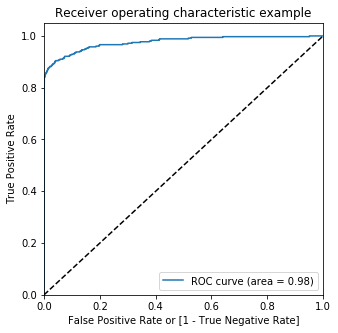

In [37]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt
# Call the ROC function

draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [38]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000182,1,0,0,0,0,0,0,0,0,0
1,0,0.000264,1,0,0,0,0,0,0,0,0,0
2,0,0.000104,1,0,0,0,0,0,0,0,0,0
3,0,0.000205,1,0,0,0,0,0,0,0,0,0
4,0,0.000011,1,0,0,0,0,0,0,0,0,0


In [39]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001786  1.000000  0.000000
0.1   0.1  0.999233  0.772472  0.999638
0.2   0.2  0.999197  0.724719  0.999688
0.3   0.3  0.999238  0.685393  0.999799
0.4   0.4  0.999223  0.654494  0.999839
0.5   0.5  0.999182  0.615169  0.999869
0.6   0.6  0.999132  0.581461  0.999879
0.7   0.7  0.999102  0.564607  0.999879
0.8   0.8  0.999062  0.542135  0.999879
0.9   0.9  0.998972  0.491573  0.999879


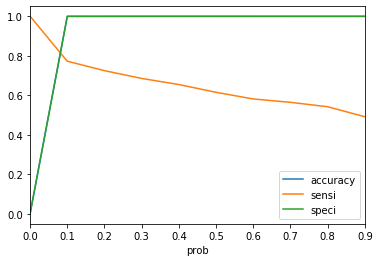

In [40]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [41]:
#Setting threshold as 0.09 based on intersection of accuracy, sensitivity and specificity lines in above graph
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x >= 0.09 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000182,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000264,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000104,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000205,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000011,1,0,0,0,0,0,0,0,0,0,0


In [42]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9992175116871652

In [43]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[198932,     76],
       [    80,    276]], dtype=int64)

In [44]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [45]:
# Calculate Sensitivity

TP/(TP+FN)

0.7752808988764045

In [46]:
# Calculate Specificity

TN/(TN+FP)

0.9996181058047917

In [47]:
from sklearn.metrics import precision_recall_curve

In [48]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

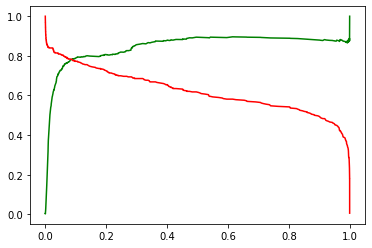

In [49]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [50]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x >= 0.1 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000182,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000264,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000104,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000205,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000011,1,0,0,0,0,0,0,0,0,0,0


In [51]:
#checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9992325595393351

In [52]:
# creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[198936,     72],
       [    81,    275]], dtype=int64)

In [53]:
print(metrics.classification_report(y_train_pred_final.Fraud, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.79      0.77      0.78       356

    accuracy                           1.00    199364
   macro avg       0.90      0.89      0.89    199364
weighted avg       1.00      1.00      1.00    199364



In [54]:
#Making Prediction on test set in below steps for Logistic regression

In [55]:
X_test = X_test[X_train_rfe.columns]
X_test.head()

,V4,V8,V10,V13,V14,V16,V20,V21,V22,V27,V28
43428,9.505594,10.741670,-14.110184,1.671120,-9.373859,-9.899247,-1.514923,1.190739,-1.127670,-2.018575,-1.042804
49906,-1.385729,0.143868,-0.565012,0.076883,-0.217884,-2.142892,0.506044,-0.213436,-0.942525,0.040996,0.102038
29474,-1.029950,-0.074780,0.756801,1.075384,-0.245772,1.769860,0.212877,0.102398,0.168269,0.011409,0.004634
276481,-0.349504,0.524498,-1.376648,1.132627,-0.550875,0.497974,-0.244633,0.358932,0.873663,-0.237386,0.001934
278846,0.327269,-0.227654,0.259452,-0.616166,0.592634,0.091077,-0.255293,-0.238644,-0.616400,-0.078043,-0.070571


In [56]:
X_test_sm = sm.add_constant(X_test)

In [57]:
y_test_pred = fin.predict(X_test_sm)
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [58]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [59]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [60]:
y_pred_final.head()

,Class,0
0,1,1.000000
1,0,0.000121
2,0,0.000037
3,0,0.000595
4,0,0.000145


In [61]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})

In [62]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Class,Fraud_Prob
0,1,1.000000
1,0,0.000121
2,0,0.000037
3,0,0.000595
4,0,0.000145


In [63]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x >= 0.1 else 0)

In [64]:
y_pred_final.head()

,Class,Fraud_Prob,final_predicted
0,1,1.000000,1
1,0,0.000121,0
2,0,0.000037,0
3,0,0.000595,0
4,0,0.000145,0


In [65]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9993562960102056

In [66]:
metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )

array([[85280,    27],
       [   28,   108]], dtype=int64)

In [67]:
print(metrics.classification_report(y_pred_final.Class, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.79      0.80       136

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### 1b. Logistic regression using LogisticRegressionCV

In [68]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
#Logistic regression
clf = LogisticRegressionCV(cv=StratifiedKFold(n_splits=3), 
                           random_state=42,
                           scoring='roc_auc',
                           penalty='elasticnet',
                           solver='saga',
                           l1_ratios=[0.8],
                           n_jobs=-1).fit(X_train_rfe, y_train)

In [69]:
y_cv_pred=np.where(clf.predict_proba(X_test)[:,1] >= 0.1,1,0)

In [70]:
print(metrics.classification_report(y_test, y_cv_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.79      0.80       136

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### 2a Decision Tree Classifier

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [72]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
# Making predictions in test dataset
y_pred_default = dt_default.predict(X_test)

In [74]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[85268    39]
 [   25   111]]


In [75]:
print(metrics.classification_report(y_test, y_pred_default))
pred_probs_test = dt_default.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.82      0.78       136

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.91


### 2b Decision Tree Classifier with hyperparameter tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# Creating the parameter grid 
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [18,19,20,21],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [11,12,13],
    'class_weight':['balanced','weight'],
    'max_features':['auto','sqrt'],
    'criterion': ["entropy", "gini"]
}


# Instantiate the randomized search model
dtree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = StratifiedKFold(n_splits=3), verbose = 1,random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0...
                                                    splitter='best'),
    

In [77]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9984350227704143 using {'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [89]:
# model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=4,
                                  max_features='auto',
                                  min_samples_split=11, class_weight = "balanced")
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=11, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [90]:
y_pred = dt_final.predict(X_test)

In [91]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85210    97]
 [   23   113]]


In [92]:
print(metrics.classification_report(y_test, y_pred_default))

#Making prediction on the test data
pred_probs_test = dt_final.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.82      0.78       136

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



'0.92'

### 3a Random Forest Classifier

In [82]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
#Prediction on test dataset
predictions = rfc.predict(X_test)

In [84]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[85300     7]
 [   26   110]]


In [85]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,predictions))
#Making prediction on the test data
pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.96


### 3b Random forest classifier with hyperparameter tuning

In [86]:
param_grid = {
    'max_depth': range(13,17),
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(1,5),
    'n_estimators': [80,90,100,110], 
    'max_features': ['auto','sqrt'],
    'criterion' : ['gini','entropy'],
    'class_weight':['balanced']
}
# Create a based model
rf = RandomForestClassifier(random_state=42,oob_score=True,bootstrap=True)
# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = StratifiedKFold(n_splits=3), n_jobs = -1,verbose = 1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                   ii

In [87]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9994733253249865 using {'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [93]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=15,
                                  class_weight='balanced',
                                  oob_score=True,
                                  n_estimators=80,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  min_samples_split=3, bootstrap = True)
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
#Prediction on test dataset
y_pred = rf_final.predict(X_test)

In [95]:
print(confusion_matrix(y_test,y_pred))

[[85302     5]
 [   27   109]]


In [96]:
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = rf_final.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.96


### 4a XGBoost classifier

In [97]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [98]:
#Prediction on test dataset
predictions = xgb_model.predict(X_test)

In [99]:
#Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[85301     6]
 [   22   114]]


In [100]:
print(metrics.classification_report(y_test,predictions))
#Making prediction on the test data
pred_probs_test = rf_final.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.96


### 4b XGBoost Classifier with hyperparameter tuning

In [101]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# specifying range of hyperparameters
param_grid = {'learning_rate' : [0.09,0.1,0.2],  
              'subsample' : [0.6,0.7,0.8]}          


# specifying model as XGBOOST Classifier
xgb = XGBClassifier()

# setting up RandomizedSearchCV()
random_search = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=3), 
                        verbose = 1,n_jobs = -1) 

# fitting the model
random_search.fit(X_train, y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  9.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           s

In [102]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9797103253272823 using {'subsample': 0.8, 'learning_rate': 0.2}


In [103]:
# fit model on training data
xgb_final = XGBClassifier(subsample=0.8,learning_rate=0.2)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [104]:
#Prediction on test dataset
y_pred = xgb_final.predict(X_test)

In [105]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85302     5]
 [   24   112]]


In [106]:
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = xgb_final.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.82      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.99


In [107]:
xgb_final.feature_importances_

array([0.02588071, 0.01597015, 0.01966602, 0.03907591, 0.01964264,
       0.02223511, 0.034666  , 0.02490182, 0.0158979 , 0.03792545,
       0.01812804, 0.04874331, 0.01565876, 0.06152957, 0.01993157,
       0.0274058 , 0.30293834, 0.01902119, 0.01707325, 0.01908947,
       0.01968873, 0.02161382, 0.01789527, 0.02136385, 0.01445548,
       0.02731447, 0.03316401, 0.01830605, 0.02081723], dtype=float32)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [110]:
#initialise the model with optimum hyperparameters
clf = XGBClassifier(subsample=0.8,learning_rate=0.2) 
clf.fit(X_train, y_train)

print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = clf.predict_proba(X_test)[:,1]
#print the evaluation score on the X_test by choosing the best evaluation metric
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.82      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.99


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


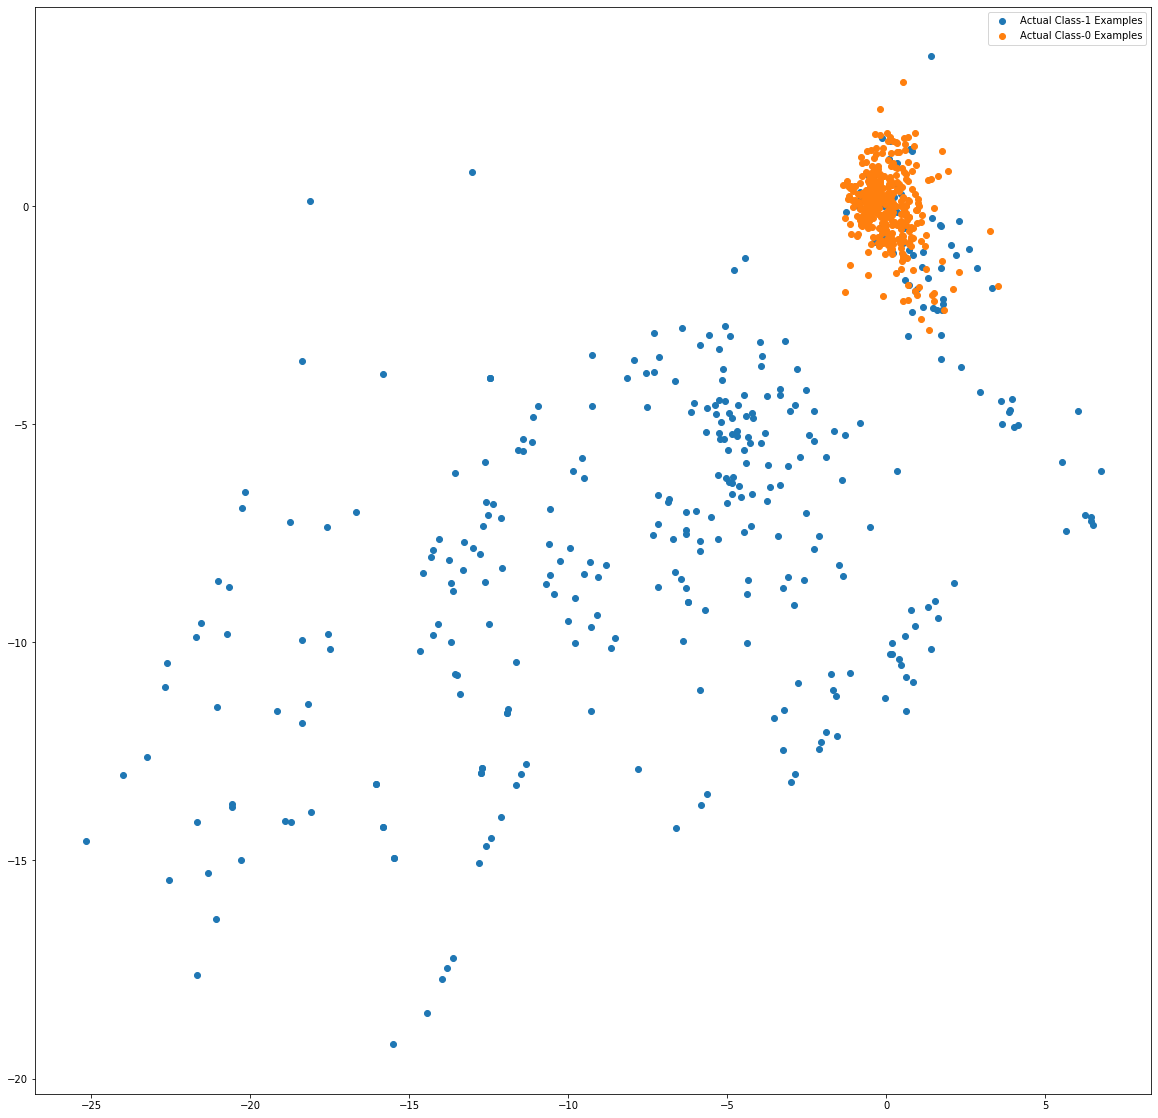

In [111]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [112]:
#Splitting train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [113]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

Using TensorFlow backend.


In [114]:
#Random Overssampling on train dataset
X_train, y_train = ros.fit_resample(X_train, y_train)

In [115]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 199008, 1: 199008})


### 1. Logistic Regression on Random Oversampled Dataset

In [117]:
#Since Amount and V8 column is heavily skewed, thus doing power transform on these columns in train and test dataset
X_train['Amount']=pw_trns.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['V8']=pw_trns.fit_transform(X_train['V8'].values.reshape(-1,1))

In [118]:
X_test['Amount']=pw_trns.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['V8']=pw_trns.fit_transform(X_test['V8'].values.reshape(-1,1))

In [136]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
#Logistic regression
clf = LogisticRegressionCV(cv=StratifiedKFold(n_splits=3), 
                           random_state=42,
                           scoring='auc_roc',
                           penalty='elasticnet',
                           solver='saga',
                           l1_ratios=[0.1],
                           n_jobs=-1).fit(X_train, y_train)

In [160]:
#Making prediction on the test data
y_pred=clf.predict(X_test)

In [161]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[80584  4723]
 [   16   120]]


In [172]:
#Setting threshold and prediction based on that threshold
y_cv_pred=np.where(clf.predict_proba(X_test)[:,1] < 0.99999999 , 0 ,1)

In [175]:
print(metrics.classification_report(y_test, y_cv_pred))
#Making prediction on the test data
print("AUC_ROC score : {:2.2f}".format(metrics.roc_auc_score(y_test, y_cv_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.67      0.69      0.68       136

    accuracy                           1.00     85443
   macro avg       0.83      0.85      0.84     85443
weighted avg       1.00      1.00      1.00     85443

AUC score : 0.85


### 2. Decision Tree Classifier on Random Oversampled Dataset

In [176]:
#Splitting train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [178]:
#Random oversampling on train dataset
X_train, y_train = ros.fit_resample(X_train, y_train)

In [180]:
# model with optimal hyperparameters
dt_final_ros = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=4,
                                  max_features='auto',
                                  min_samples_split=11)
dt_final_ros.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [181]:
#Making prediction on the test data
y_pred = dt_final_ros.predict(X_test)

In [182]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85242    65]
 [   33   103]]


In [185]:
#Classification Matrix
print(metrics.classification_report(y_test, y_pred))
pred_probs_test = dt_final_ros.predict_proba(X_test)[:,1]
print("AUC_ROC score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.61      0.76      0.68       136

    accuracy                           1.00     85443
   macro avg       0.81      0.88      0.84     85443
weighted avg       1.00      1.00      1.00     85443

AUC_ROC score: 0.88


### 3. Random Forest Classifier on Random Oversampled Dataset

In [186]:
# model with optimal hyperparameters
rf_final_ros = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=15,
                                  oob_score=True,
                                  n_estimators=80,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  min_samples_split=3, bootstrap = True)
rf_final_ros.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [187]:
#Prediction on test dataset
y_pred = rf_final_ros.predict(X_test)

In [188]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85299     8]
 [   22   114]]


In [189]:
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = rf_final_ros.predict_proba(X_test)[:,1]
print("AUC_ROC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.84      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.98


### 4. XGBoost Classifier on Random Oversampled Dataset

In [191]:
# fit model on training data
xgb_final_ros = XGBClassifier(subsample=0.8,learning_rate=0.2)
xgb_final_ros.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [192]:
#Prediction on test dataset
y_pred = xgb_final_ros.predict(X_test)

In [193]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85292    15]
 [   19   117]]


In [194]:
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = xgb_final_ros.predict_proba(X_test)[:,1]
print("AUC_ROC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.86      0.87       136

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.98


In [195]:
#Splitting train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

### Print the class distribution after applying SMOTE 

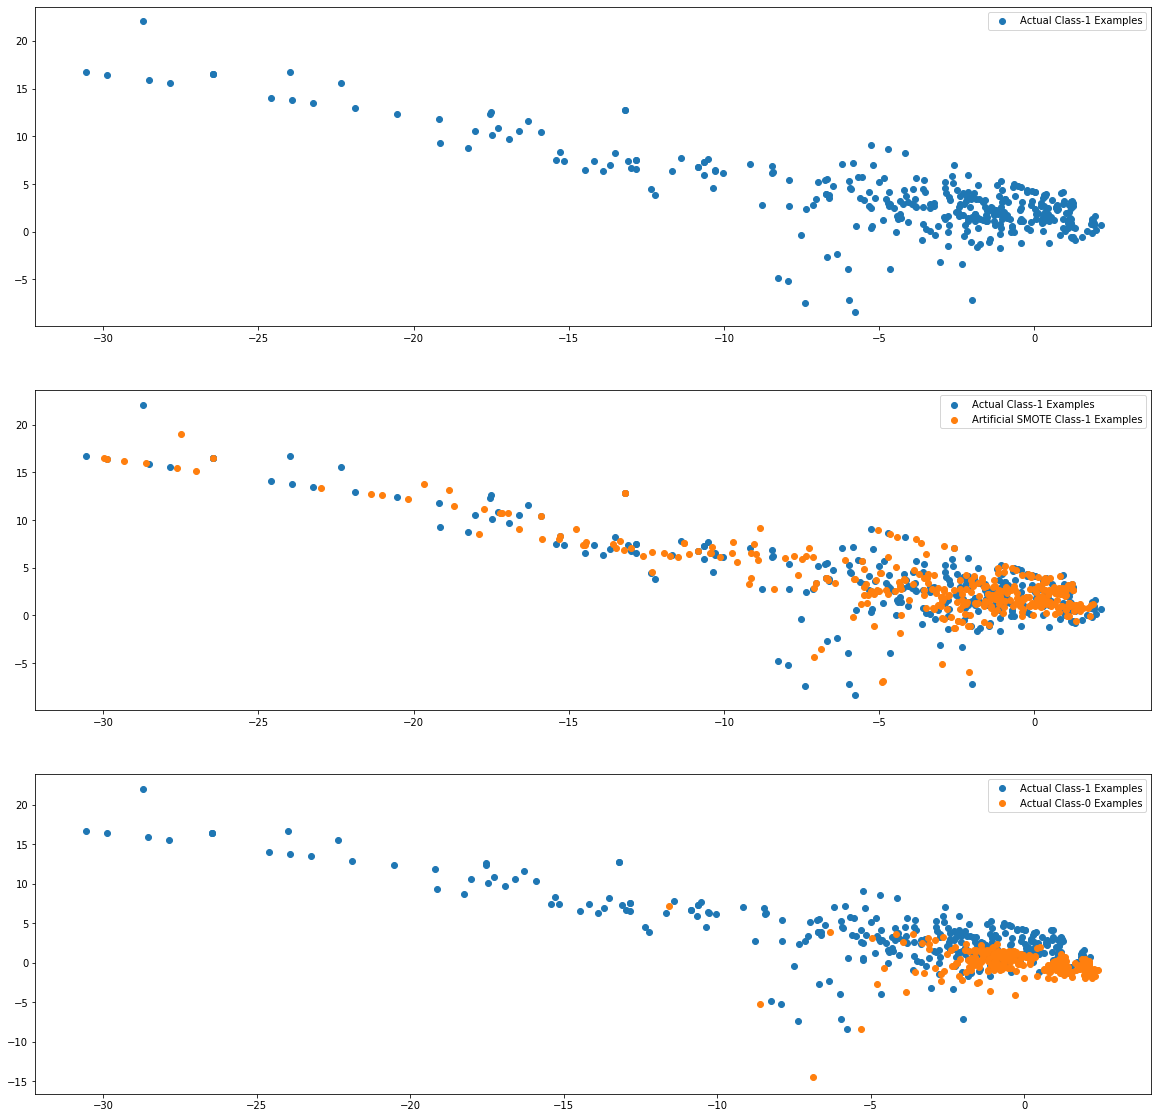

In [197]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [198]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_smote))

Resampled dataset shape Counter({0: 199008, 1: 199008})


### 1. Logistic Regression on synthetic sample generated by SMOTE

In [199]:
#Since Amount and V8 column is heavily skewed, thus doing power transform on these columns in train and test dataset
X_train_smote['Amount']=pw_trns.fit_transform(X_train_smote['Amount'].values.reshape(-1,1))
X_train_smote['V8']=pw_trns.fit_transform(X_train_smote['V8'].values.reshape(-1,1))

In [201]:
X_test['Amount']=pw_trns.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['V8']=pw_trns.fit_transform(X_test['V8'].values.reshape(-1,1))

In [202]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
clf_sm = LogisticRegressionCV(cv=StratifiedKFold(n_splits=3), 
                           random_state=42,
                           scoring='roc_auc',
                           penalty='elasticnet',
                           solver='saga',
                           l1_ratios=[0.1],
                           n_jobs=-1).fit(X_train_smote, y_train_smote)

In [230]:
#Setting threshold value and doing prediction based on that threshold
y_cv_pred=np.where(clf_sm.predict_proba(X_test)[:,1] >= 0.999999999,1,0)

In [231]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_cv_pred))

[[85285    22]
 [   37    99]]


In [233]:
#Classification report
print(metrics.classification_report(y_test, y_cv_pred))
print("AUC_ROC score: {:2.2f}".format(metrics.roc_auc_score(y_test, y_cv_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.73      0.77       136

    accuracy                           1.00     85443
   macro avg       0.91      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC_ROC score: 0.86


### 2. Decision Tree Classifier on synthetic sample generated by SMOTE

In [234]:
#Splitting train ans test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [235]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [236]:
# Create the parameter grid 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [35,38,41],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [5,7,9,11],
    'max_features':['auto','sqrt']
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = StratifiedKFold(n_splits=3), verbose = 1,random_state=42,n_jobs=-1)

# Fit the grid search to the data
random_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
  

In [237]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9976131612799485 using {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 38, 'criterion': 'entropy'}


In [238]:
# model with optimal hyperparameters
dt_final_sm = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=38, 
                                  min_samples_leaf=2,
                                  max_features='auto',
                                  min_samples_split=7)
dt_final_sm.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=38, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [239]:
#Prediction on test dataset
y_pred = dt_final_sm.predict(X_test)

In [240]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85130   177]
 [   29   107]]


In [241]:
print(metrics.classification_report(y_test, y_pred))

#Making prediction on the test data
pred_probs_test = dt_final_sm.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.38      0.79      0.51       136

    accuracy                           1.00     85443
   macro avg       0.69      0.89      0.75     85443
weighted avg       1.00      1.00      1.00     85443



'0.91'

### 3. Random Forest Classifier on synthetic sample generated by SMOTE

In [242]:
#Initializing parameter grid
param_grid = {
    'max_depth': range(15,20),
    'min_samples_leaf': range(2,5),
    'min_samples_split': range(2,5),
    'n_estimators': [100,110,120], 
    'max_features': ['auto','sqrt'],
    'criterion' : ['gini','entropy']
}
# Create a based model
rf = RandomForestClassifier(random_state=42,oob_score=True,bootstrap=True)
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = StratifiedKFold(n_splits=3), n_jobs = -1,verbose = 1)

random_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 30.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [243]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9998492522913652 using {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy'}


In [244]:
# model with optimal hyperparameters
rf_final_sm = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=19,
                                  oob_score=True,
                                  n_estimators=110,
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  min_samples_split=2, bootstrap = True)
rf_final_sm.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=19, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [245]:
#Predicting on test dataset
y_pred = rf_final_sm.predict(X_test)

In [246]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85281    26]
 [   16   120]]


In [247]:
#Classification report
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = rf_final_sm.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.99


### 4. XGBoost Classifier on synthetic sample generated by SMOTE

In [248]:
# specifying range of hyperparameters
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
param_grid = {'learning_rate' : [0.1,0.3,0.5],  
              'subsample' : [0.6,0.7,0.8]}          


# specifying model as XGBoost
xgb = XGBClassifier()

# setting up RandomizedSearchCV()
random_search = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=3), 
                        verbose = 1,n_jobs = -1) 

# fitting the model
random_search.fit(X_train_smote, y_train_smote) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 22.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           s

In [249]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9999940095344568 using {'subsample': 0.6, 'learning_rate': 0.5}


In [250]:
# fitting model on training data (smote)
xgb_final_sm = XGBClassifier(subsample=0.6,learning_rate=0.5)
xgb_final_sm.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)

In [251]:
#Predicting on test dataset
y_pred = xgb_final_sm.predict(X_test)

In [252]:
#Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[85277    30]
 [   17   119]]


In [253]:
#Classification report
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = xgb_final_sm.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.99


### Print the class distribution after applying ADASYN

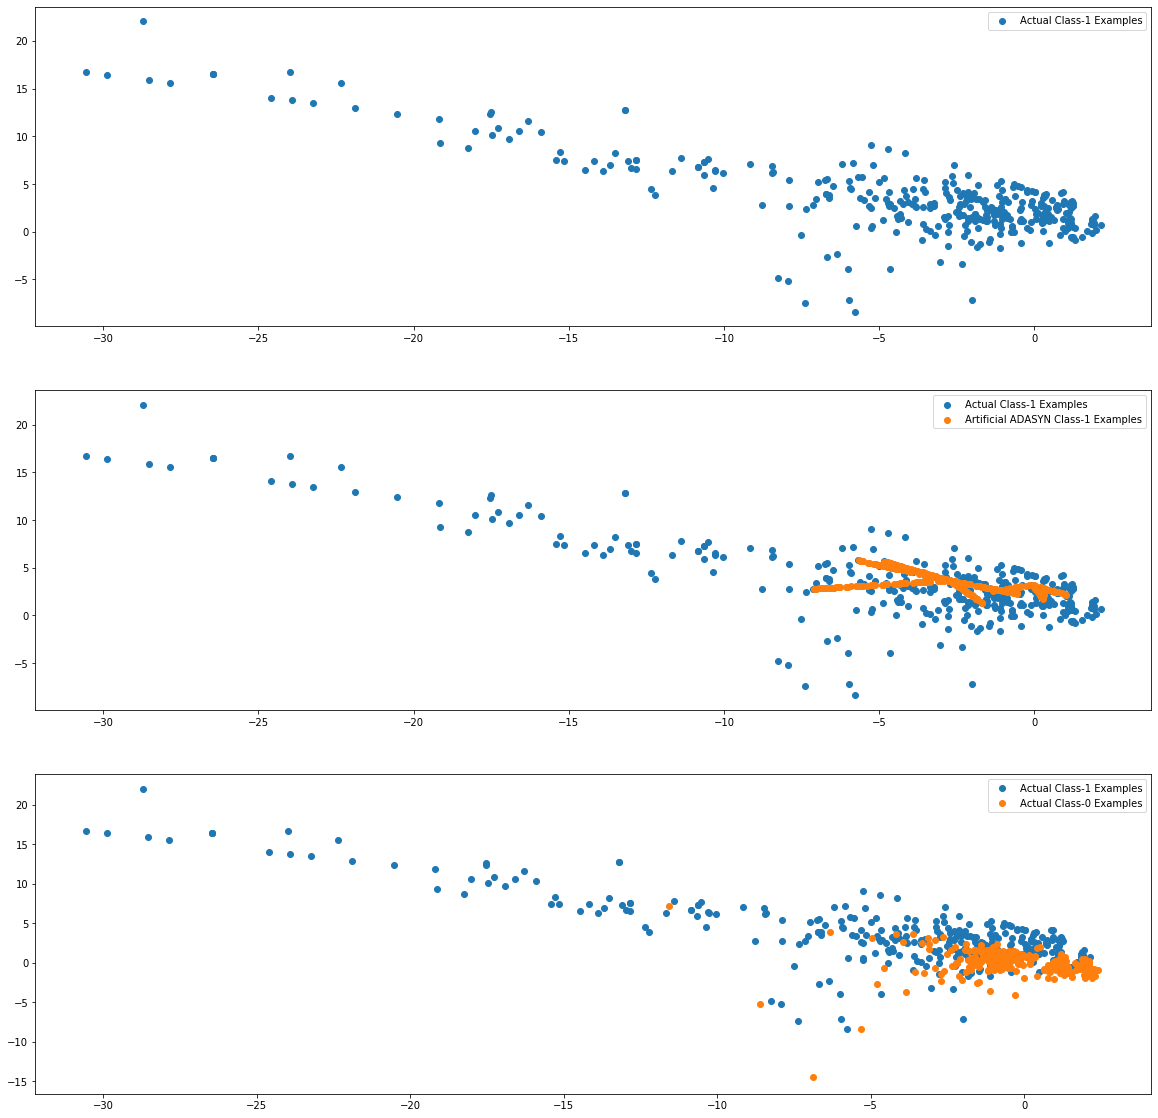

In [254]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [255]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Resampled dataset shape Counter({1: 199011, 0: 199008})


### Logistic Regression on synthetic sample generated by ADASYN

In [256]:
#Since Amount and V8 column is heavily skewed, thus doing power transform on these columns in train and test dataset
X_train_adasyn['Amount']=pw_trns.fit_transform(X_train_adasyn['Amount'].values.reshape(-1,1))
X_train_adasyn['V8']=pw_trns.fit_transform(X_train_adasyn['V8'].values.reshape(-1,1))

In [257]:
X_test['Amount']=pw_trns.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['V8']=pw_trns.fit_transform(X_test['V8'].values.reshape(-1,1))

In [258]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

#Logistic Regression
clf = LogisticRegressionCV(cv=StratifiedKFold(n_splits=3), 
                           random_state=42,
                           scoring='roc_auc',
                           penalty='elasticnet',
                           solver='saga',
                           l1_ratios=[0.1],
                           n_jobs=-1).fit(X_train_adasyn, y_train_adasyn)

In [265]:
#Setting threshold and prediction based on that threshold
y_cv_pred=np.where(clf.predict_proba(X_test)[:,1] >= 0.99999999,1,0)

In [266]:
#Confusion Matrix
print(confusion_matrix(y_test,y_cv_pred))

[[85269    38]
 [   28   108]]


In [276]:
#classification report
print(metrics.classification_report(y_test, y_cv_pred))
print("AUC_ROC score: {:2.2f}".format(metrics.roc_auc_score(y_test, y_cv_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.79      0.77       136

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443

AUC_ROC score: 0.90


### 2. Decision Tree Classifier on synthetic sample generated by ADASYN

In [290]:
#Splitting train ans test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [269]:
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [270]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# Creating the parameter grid 
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [35,38,41],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [5,7,9,11],
    'max_features':['auto','sqrt']
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = StratifiedKFold(n_splits=3), verbose = 1,random_state=42,n_jobs=-1)

# Fit the grid search to the data
random_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
  

In [271]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9410379906486877 using {'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 38, 'criterion': 'entropy'}


In [272]:
# model with optimal hyperparameters
dt_final_ads = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=38, 
                                  min_samples_leaf=6,
                                  max_features='sqrt',
                                  min_samples_split=7)
dt_final_ads.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=38, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [273]:
#Predicting on test dataset
y_pred = dt_final_ads.predict(X_test)

In [274]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85105   202]
 [   20   116]]


In [275]:
print(metrics.classification_report(y_test, y_pred))

#Making prediction on the test data
pred_probs_test = dt_final_ads.predict_proba(X_test)[:,1]
print("AUC_ROC score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.36      0.85      0.51       136

    accuracy                           1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443

AUC_ROC score: 0.94


### 3. Random Forest Classifier on synthetic sample generated by ADASYN

In [277]:
# Creating the parameter grid
param_grid = {
    'max_depth': [11,13,15,17],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(1,5),
    'n_estimators': [100,110,120], 
    'max_features': ['auto','sqrt'],
    'criterion' : ['gini','entropy']
}
# Creating a base model
rf = RandomForestClassifier(random_state=42,oob_score=True,bootstrap=True)
# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = StratifiedKFold(n_splits=3), n_jobs = -1,verbose = 1)

random_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [278]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9610722101206225 using {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'entropy'}


In [280]:
# model with optimal hyperparameters
rf_final_ads = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=11,
                                  oob_score=True,
                                  n_estimators=100,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  min_samples_split=3, bootstrap = True)
rf_final_ads.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [281]:
#predicting on test dataset
y_pred = rf_final_ads.predict(X_test)

In [282]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85072   235]
 [   14   122]]


In [283]:
#Classification report
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = rf_final_ads.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.90      0.49       136

    accuracy                           1.00     85443
   macro avg       0.67      0.95      0.75     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.99


### 4. XGBoost Classifier on synthetic sample generated by ADASYN

In [284]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# specifying range of hyperparameters
param_grid = {'learning_rate' : [0.1,0.3,0.5],  
              'subsample' : [0.6,0.7,0.8]}          


# specifying model as XGBOOST Classifier
xgb = XGBClassifier()

# setting up RandomizedSearchCV()
random_search = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=3), 
                        verbose = 1,n_jobs = -1) 
random_search.fit(X_train_smote, y_train_smote) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 22.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           s

In [285]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9999940095344568 using {'subsample': 0.6, 'learning_rate': 0.5}


In [286]:
# fit model on training data
xgb_final_ads = XGBClassifier(subsample=0.6,learning_rate=0.5)
xgb_final_ads.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)

In [287]:
#Prediction on test dataset
y_pred = xgb_final_ads.predict(X_test)

In [288]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85276    31]
 [   16   120]]


In [289]:
#Classification report
print(metrics.classification_report(y_test,y_pred))
#Making prediction on the test data
pred_probs_test = xgb_final_ads.predict_proba(X_test)[:,1]
print("AUC Score: {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.98


##### Build models on other algorithms to see the better performing on SMOTE

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)